**Introduction:**

This analysis explores the relationship between the rank of the major and the corresponding career salary using a given dataset. The dataset contains information about various majors and their associated ranks and career salaries.

**Data Collection:**

The data was collected from the "College Salary Report" webpage, an annual publication that provides detailed information about the potential earnings of graduates from various degree programs across different institutions.


**Data Processing:**

- Web Scraping with Beautiful Soup: I used the BeautifulSoup module in conjunction with the requests library to fetch the webpage containing PayScale's College Salary Report.

- Data Extraction: With the structured format provided by Beautiful Soup, I navigated through the HTML tags and attributes to locate the specific tables or sections containing the data about majors and their corresponding salaries. Relevant data points were then extracted from these tables or sections.

- Transformation to CSV: After extracting the relevant data, I used Python's csv module to write this data into a CSV file.

**Data Overview:**
The dataset encompasses variables including the major's rank, the major, degree type, early-career pay, mid-career pay, and the high meaning in the job. For this analysis, our primary focus will be on comparing the rank with both early-career pay and mid-career pay.

In [ ]:
try:
    from bs4 import BeautifulSoup
    import pandas
    # print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !pip install --yes --prefix {sys.prefix} bs4
    !pip install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    # print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

opened_webpage = requests.get("https://www.payscale.com/college-salary-report/majors-that-pay-you-back/bachelors")
# print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.content, "html.parser")
# print ("Webpage loaded and parsed successfully...")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

raw_data = []
# Find all the tables in the webpage page that I have just parsed
table = bs.find_all("table")
for row in table:
    line = row.text
    raw_data.append(line)

final_data = []
for l in raw_data:
    entries = l.split('Rank:')  # This should split our data for every 'Rank:' occurrence, creating 'rows'
    entries = entries[1:]  # The first entry will be empty, so skip it

    for entry in entries:
        row = {}
        # Extract Rank, which is always at the beginning
        rank_value = entry.split('Major:')[0].strip()
        row['Rank'] = rank_value
        # Extract Major
        major_value = entry.split('Major:')[1].split('Degree Type:')[0].strip()
        row['Major'] = major_value
        # Extract Degree Type
        degree_value = entry.split('Degree Type:')[1].split('Early Career Pay:')[0].strip()
        row['Degree Type'] = degree_value
        # Extract Early Career Pay
        early_pay_value = entry.split('Early Career Pay:')[1].split('Mid-Career Pay:')[0].strip()
        row['Early Career Pay'] = early_pay_value
        # Extract Mid-Career Pay
        mid_pay_value = entry.split('Mid-Career Pay:')[1].split('% High Meaning:')[0].strip()
        row['Mid-Career Pay'] = mid_pay_value
        # Extract % High Meaning
        high_meaning_value = entry.split('% High Meaning:')[1].strip()
        row['% High Meaning'] = high_meaning_value

        final_data.append(row)

df = pd.DataFrame(final_data)
df = df.set_index('Rank')

df.to_csv("Highest_Paying_Jobs.csv")

jobs_df = pd.read_csv("Highest_Paying_Jobs.csv")
jobs_df = jobs_df.set_index('Rank')
jobs_df

,Major,Degree Type,Early Career Pay,Mid-Career Pay,% High Meaning
Rank,,,,,
1,Petroleum Engineering,Bachelors,"$97,500","$212,500",61%
2,Operations Research & Industrial Engineering,Bachelors,"$98,300","$191,800",21%
3,Interaction Design,Bachelors,"$74,700","$173,600",54%
4,Applied Economics and Management,Bachelors,"$76,500","$164,400",54%
5,Building Science,Bachelors,"$69,000","$163,100",47%
6,Actuarial Mathematics,Bachelors,"$70,700","$160,000",52%
6,Operations Research,Bachelors,"$92,200","$160,000",57%
8,Systems Engineering,Bachelors,"$87,000","$159,100",58%
9,Optical Science & Engineering,Bachelors,"$79,600","$158,300",73%


**Data Visualization for Early Career Pay:**
A bar graph was created to visualize the relationship between major rank and early career pay.

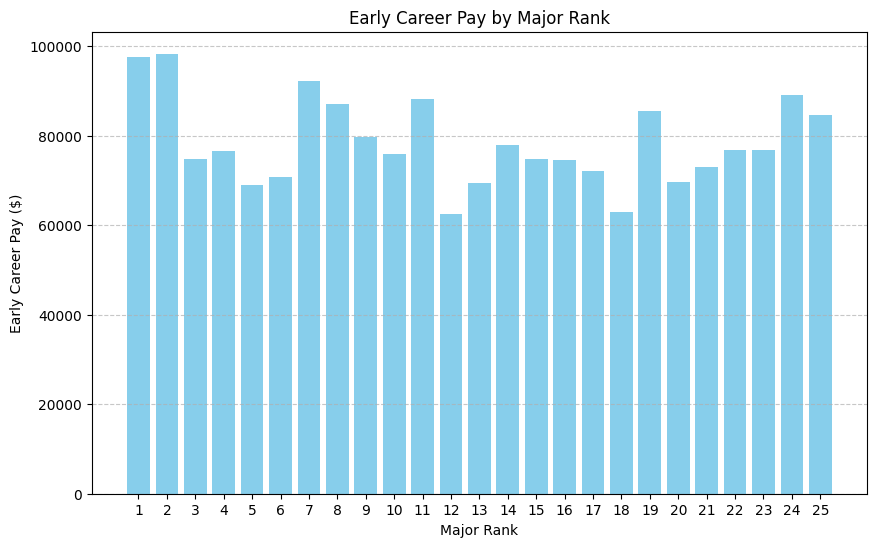

In [ ]:
# Data visualization for early pay
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
# print ("Imported all libraries successfully...")

early_career_pay = [int(item['Early Career Pay'].replace('$', '').replace(',', '')) for item in final_data]
ranks = [int(item['Rank']) for item in final_data]
majors = [item['Major'] for item in final_data]

# Check for duplicate ranks and adjust accordingly
seen = set()
for i, rank in enumerate(ranks):
    if rank in seen:
        ranks[i] = rank + 1
    seen.add(rank)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ranks, early_career_pay, color='skyblue')

# Customizing the chart
plt.title('Early Career Pay by Major Rank')
plt.xlabel('Major Rank')
plt.ylabel('Early Career Pay ($)')
plt.xticks(ranks, [str(rank) for rank in ranks])
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();

**Data Visualization for Mid Career Pay:**
A bar graph was created to visualize the relationship between major rank and mid career pay.

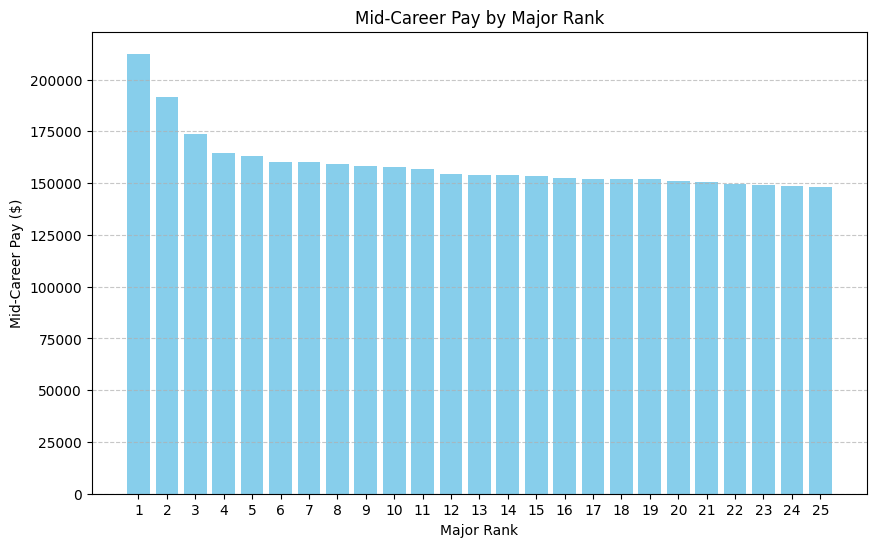

In [ ]:
# Data Visualization for mid pay
mid_career_pay = [int(item['Mid-Career Pay'].replace('$', '').replace(',', '')) for item in final_data]
ranks = [int(item['Rank']) for item in final_data]
majors = [item['Major'] for item in final_data]

# Check for duplicate ranks and adjust accordingly
seen = set()
for i, rank in enumerate(ranks):
    if rank in seen:
        ranks[i] = rank + 1
    seen.add(rank)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ranks, mid_career_pay, color='skyblue')

# Customizing the chart
plt.title('Mid-Career Pay by Major Rank')
plt.xlabel('Major Rank')
plt.ylabel('Mid-Career Pay ($)')
plt.xticks(ranks, [str(rank) for rank in ranks])
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();